#Regressão Linear

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Carregando Dados

In [ ]:
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 75 (delta 26), reused 26 (delta 4), pack-reused 0
Unpacking objects: 100% (75/75), done.


## Funções Auxiliares

In [ ]:
def loadDataSet(filename='MLUD/Aula04/svbr.csv', my_delimiter=';'):
    baseDeDados = pd.read_csv(filename, delimiter=my_delimiter)
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values

    return X, y

def fillMissingData(X):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,1:] = imputer.fit_transform(X[:,1:])

    return X

def computeCategorization(X):
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
    D = pd.get_dummies(X[:,0])
    X = X[:,1:]
    X = np.insert(X, 0, D.values.T, axis=1)
    
    return X

def splitTrainTestSets(X, y, testSize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
    
    return X_train, X_test, y_train, y_test

def computeNormalization(XTrain, XTest):
    scaleX = StandardScaler()
    XTrain = scaleX.fit_transform(XTrain)
    XTest = scaleX.fit_transform(XTest)
    
    return XTrain, XTest
  

## Funções

In [ ]:
def computeLinearRegressionModel(X_train, X_test, y_train, y_test):
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  #print("Y TEST\n", y_test)
  #print("\nY PRED\n", y_pred)

  plt.scatter(X_test[:,-1], y_test, color='r')
  plt.plot(X_test[:,-1], y_pred, color='b')
  plt.title('Inscritos x Visualizações')
  plt.xlabel('Total de Inscritos')
  plt.ylabel('Total de Visualizações')
  plt.show()

def RunLinearRegressionExample(filename='MLUD/Aula04/svbr.csv', my_delimiter=';'):
  X, y = loadDataSet(filename, my_delimiter)
  X = fillMissingData(X)
  X = computeCategorization(X)
  X_train, X_test, y_train, y_test = splitTrainTestSets(X, y, 0.8)

  computeLinearRegressionModel(X_train, X_test, y_train, y_test)

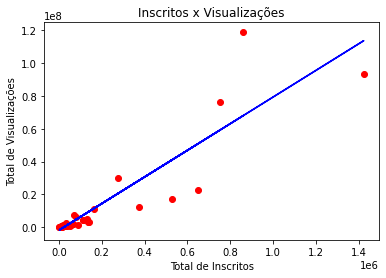

In [ ]:
RunLinearRegressionExample('MLUD/Aula04/svbr.csv', ';')